In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install sklearn

In [2]:
train=pd.read_csv(r'C:\Users\Win 8.1\Documents\AmEx\train.csv')
test=pd.read_csv(r'C:\Users\Win 8.1\Documents\AmEx\test_9K3DBWQ.csv')

In [3]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [4]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,43223,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,...,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,12368,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,...,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,40415,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,...,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [5]:
train.shape

(32820, 44)

In [6]:
train.dtypes

id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit

In [7]:
test.shape

(14067, 43)

In [8]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(32820, 45) (14067, 44) (46887, 45)


C:\Users\Win 8.1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data.apply(lambda x: sum(x.isnull()))

account_type                 0
age                          0
card_lim                    12
cc_cons                  14067
cc_cons_apr                  0
cc_cons_jun                  0
cc_cons_may                  0
cc_count_apr              3437
cc_count_jun              2224
cc_count_may              1695
credit_amount_apr         4767
credit_amount_jun         2206
credit_amount_may         4900
credit_count_apr          2546
credit_count_jun          2183
credit_count_may          2968
dc_cons_apr              27282
dc_cons_jun              30361
dc_cons_may              24714
dc_count_apr             27282
dc_count_jun             22049
dc_count_may             24714
debit_amount_apr          2737
debit_amount_jun          3140
debit_amount_may          3302
debit_count_apr           2546
debit_count_jun           2183
debit_count_may           2968
emi_active                   0
gender                       0
id                           0
investment_1             44811
investme

In [10]:
data.describe()

,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,...,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
count,46887.000000,4.687500e+04,32820.000000,46887.000000,46887.000000,4.688700e+04,43450.000000,44663.000000,45192.000000,4.212000e+04,...,1.946000e+03,579.000000,4.212000e+04,4.468100e+04,4.198700e+04,3876.0,4142.0,46887.000000,1201.0,2306.0
mean,35.945678,1.214109e+05,6824.631840,16589.430023,8944.150405,1.433541e+04,9.165386,12.324362,9.549522,7.499329e+04,...,4.133151e+04,4757.864336,4.605661e+04,4.401207e+04,4.930503e+04,1.0,1.0,555.055751,1.0,1.0
std,8.434601,1.229824e+05,12459.140593,24918.706736,15648.838015,2.323877e+04,10.184364,11.549236,9.465068,1.658658e+05,...,1.077728e+05,6125.215059,1.069466e+05,1.071309e+05,1.200914e+05,0.0,0.0,188.289092,0.0,0.0
min,22.000000,0.000000e+00,0.000000,233.970000,51.000000,1.030000e+02,1.000000,1.000000,1.000000,2.400000e+01,...,0.000000e+00,-20217.000000,1.800000e-01,6.000000e-02,1.500000e-01,1.0,1.0,123.000000,1.0,1.0
25%,31.000000,4.500000e+04,1285.000000,3690.000000,1626.305000,2.970795e+03,3.000000,4.000000,3.000000,2.538712e+04,...,6.000000e+03,909.000000,1.800000e+04,1.608900e+04,1.826350e+04,1.0,1.0,425.000000,1.0,1.0
50%,34.000000,7.500000e+04,3141.000000,8897.500000,4109.000000,7.337000e+03,7.000000,9.000000,7.000000,4.403300e+04,...,2.500000e+04,4889.000000,2.816000e+04,2.700000e+04,3.000000e+04,1.0,1.0,575.000000,1.0,1.0
75%,39.000000,1.450000e+05,7349.250000,19920.945000,10012.547500,1.680478e+04,12.000000,17.000000,13.000000,7.920906e+04,...,5.000000e+04,6885.000000,4.800000e+04,4.738600e+04,5.000000e+04,1.0,1.0,683.000000,1.0,1.0
max,224.000000,1.350000e+06,408630.000000,804712.580000,429522.430000,1.117246e+06,1012.000000,653.000000,601.000000,1.310058e+07,...,2.500000e+06,35346.000000,1.202915e+07,1.293238e+07,1.285103e+07,1.0,1.0,978.000000,1.0,1.0


In [11]:
data.apply(lambda x: len(x.unique()))

account_type                 2
age                         64
card_lim                   622
cc_cons                  13118
cc_cons_apr              42405
cc_cons_jun              30735
cc_cons_may              41528
cc_count_apr                92
cc_count_jun               113
cc_count_may                95
credit_amount_apr        37622
credit_amount_jun        39814
credit_amount_may        38084
credit_count_apr            55
credit_count_jun            72
credit_count_may            58
dc_cons_apr              12734
dc_cons_jun               9169
dc_cons_may              13544
dc_count_apr                65
dc_count_jun                92
dc_count_may                78
debit_amount_apr         43274
debit_amount_jun         43397
debit_amount_may         42997
debit_count_apr            107
debit_count_jun            123
debit_count_may            105
emi_active               23966
gender                       2
id                       46887
investment_1              1962
investme

In [12]:
missing_data=data.isnull()
for column in missing_data.columns.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(missing_data[column].sum()*100/data.shape[0])
    print("")

account_type
False    46887
Name: account_type, dtype: int64
0.0

age
False    46887
Name: age, dtype: int64
0.0

card_lim
False    46875
True        12
Name: card_lim, dtype: int64
0.025593448077292212

cc_cons
False    32820
True     14067
Name: cc_cons, dtype: int64
30.0019195086058

cc_cons_apr
False    46887
Name: cc_cons_apr, dtype: int64
0.0

cc_cons_jun
False    46887
Name: cc_cons_jun, dtype: int64
0.0

cc_cons_may
False    46887
Name: cc_cons_may, dtype: int64
0.0

cc_count_apr
False    43450
True      3437
Name: cc_count_apr, dtype: int64
7.330390086804445

cc_count_jun
False    44663
True      2224
Name: cc_count_jun, dtype: int64
4.743319043658157

cc_count_may
False    45192
True      1695
Name: cc_count_may, dtype: int64
3.615074540917525

credit_amount_apr
False    42120
True      4767
Name: credit_amount_apr, dtype: int64
10.166997248704332

credit_amount_jun
False    44681
True      2206
Name: credit_amount_jun, dtype: int64
4.704928871542219

credit_amount_may
False 

In [13]:
data.columns

Index(['account_type', 'age', 'card_lim', 'cc_cons', 'cc_cons_apr',
       'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun',
       'cc_count_may', 'credit_amount_apr', 'credit_amount_jun',
       'credit_amount_may', 'credit_count_apr', 'credit_count_jun',
       'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may',
       'dc_count_apr', 'dc_count_jun', 'dc_count_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'debit_count_apr',
       'debit_count_jun', 'debit_count_may', 'emi_active', 'gender', 'id',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'loan_enq', 'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'personal_loan_active', 'personal_loan_closed',
       'region_code', 'source', 'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [14]:
data.drop(['dc_cons_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun','personal_loan_active','vehicle_loan_active','personal_loan_closed',
'vehicle_loan_closed', 'region_code','gender','account_type','age',
'investment_1','investment_2',
'investment_3','investment_4',
'loan_enq'], axis = 1, inplace=True) 

In [15]:
data.columns

Index(['card_lim', 'cc_cons', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'cc_count_apr', 'cc_count_jun', 'cc_count_may', 'credit_amount_apr',
       'credit_amount_jun', 'credit_amount_may', 'credit_count_apr',
       'credit_count_jun', 'credit_count_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'debit_count_apr',
       'debit_count_jun', 'debit_count_may', 'emi_active', 'id',
       'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'source'],
      dtype='object')

In [16]:
data.shape

(46887, 26)

In [17]:
missing_data=data.isnull()
for column in missing_data.columns.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(missing_data[column].sum()*100/data.shape[0])
    print("")

card_lim
False    46875
True        12
Name: card_lim, dtype: int64
0.025593448077292212

cc_cons
False    32820
True     14067
Name: cc_cons, dtype: int64
30.0019195086058

cc_cons_apr
False    46887
Name: cc_cons_apr, dtype: int64
0.0

cc_cons_jun
False    46887
Name: cc_cons_jun, dtype: int64
0.0

cc_cons_may
False    46887
Name: cc_cons_may, dtype: int64
0.0

cc_count_apr
False    43450
True      3437
Name: cc_count_apr, dtype: int64
7.330390086804445

cc_count_jun
False    44663
True      2224
Name: cc_count_jun, dtype: int64
4.743319043658157

cc_count_may
False    45192
True      1695
Name: cc_count_may, dtype: int64
3.615074540917525

credit_amount_apr
False    42120
True      4767
Name: credit_amount_apr, dtype: int64
10.166997248704332

credit_amount_jun
False    44681
True      2206
Name: credit_amount_jun, dtype: int64
4.704928871542219

credit_amount_may
False    41987
True      4900
Name: credit_amount_may, dtype: int64
10.45065796489432

credit_count_apr
False    44341
T

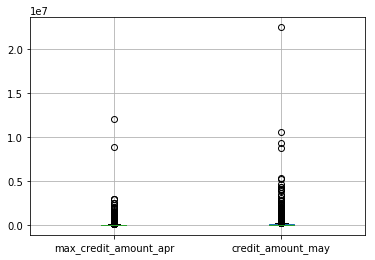

In [18]:
boxplot=data.boxplot(column=['max_credit_amount_apr','credit_amount_may'])

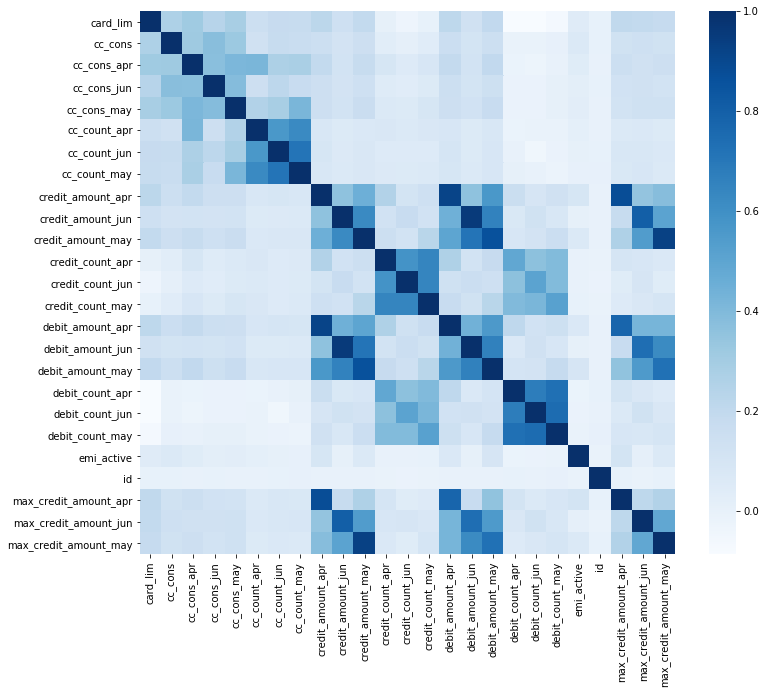

In [19]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=False, cmap="Blues")
plt.show()

In [20]:
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [21]:
to_drop

['debit_amount_apr',
 'debit_amount_jun',
 'debit_amount_may',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may']

In [22]:
data.drop(['debit_amount_apr',
 'debit_amount_jun',
 'debit_amount_may',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may'], axis=1, inplace=True)

In [23]:
data.head()

,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,id,source
0,150000.0,435.0,7695.00,622.0,479.00,2.0,3.0,1.0,50259.0,1279.37,114252.0,1.0,7.0,3.0,3.0,3.0,2.0,0.00,23334,train
1,176000.0,1921.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,169812.0,55390.00,174606.0,9.0,8.0,6.0,20.0,19.0,10.0,4963.33,20329,train
2,65000.0,1970.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,38942.0,29297.91,23051.0,4.0,6.0,2.0,16.0,19.0,7.0,0.00,17679,train
3,600000.0,21579.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,2294.0,7544.00,19529.0,1.0,3.0,1.0,2.0,1.0,1.0,1238.18,16428,train
4,100000.0,1814.0,1183.83,945.0,3656.29,2.0,9.0,7.0,10271.0,53483.00,3194.0,1.0,4.0,2.0,6.0,4.0,3.0,0.00,18721,train


In [24]:
data.shape

(46887, 20)

In [25]:
missing_data=data.isnull()
for column in missing_data.columns.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(missing_data[column].sum()*100/train.shape[0])
    print("")

card_lim
False    46875
True        12
Name: card_lim, dtype: int64
0.03656307129798903

cc_cons
False    32820
True     14067
Name: cc_cons, dtype: int64
42.86106032906764

cc_cons_apr
False    46887
Name: cc_cons_apr, dtype: int64
0.0

cc_cons_jun
False    46887
Name: cc_cons_jun, dtype: int64
0.0

cc_cons_may
False    46887
Name: cc_cons_may, dtype: int64
0.0

cc_count_apr
False    43450
True      3437
Name: cc_count_apr, dtype: int64
10.472273004265691

cc_count_jun
False    44663
True      2224
Name: cc_count_jun, dtype: int64
6.776355880560634

cc_count_may
False    45192
True      1695
Name: cc_count_may, dtype: int64
5.16453382084095

credit_amount_apr
False    42120
True      4767
Name: credit_amount_apr, dtype: int64
14.524680073126143

credit_amount_jun
False    44681
True      2206
Name: credit_amount_jun, dtype: int64
6.72151127361365

credit_amount_may
False    41987
True      4900
Name: credit_amount_may, dtype: int64
14.929920780012187

credit_count_apr
False    44341
T

In [26]:
'card_lim','cc_count_apr','cc_count_jun','cc_count_may','credit_amount_apr','credit_amount_jun','credit_amount_may',

('card_lim',
 'cc_count_apr',
 'cc_count_jun',
 'cc_count_may',
 'credit_amount_apr',
 'credit_amount_jun',
 'credit_amount_may')

In [27]:
'credit_count_apr','credit_count_jun','debit_count_may','debit_count_jun','debit_count_apr'

('credit_count_apr',
 'credit_count_jun',
 'debit_count_may',
 'debit_count_jun',
 'debit_count_apr')

In [28]:
data.describe()

,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,id
count,4.687500e+04,32820.000000,46887.000000,46887.000000,4.688700e+04,43450.000000,44663.000000,45192.000000,4.212000e+04,4.468100e+04,4.198700e+04,44341.000000,44704.000000,43919.000000,44341.000000,44704.000000,43919.000000,4.688700e+04,46887.000000
mean,1.214109e+05,6824.631840,16589.430023,8944.150405,1.433541e+04,9.165386,12.324362,9.549522,7.499329e+04,7.444493e+04,7.899627e+04,3.801358,5.788475,4.101277,14.927201,15.990113,13.945263,8.993785e+03,23443.000000
std,1.229824e+05,12459.140593,24918.706736,15648.838015,2.323877e+04,10.184364,11.549236,9.465068,1.658658e+05,2.627126e+05,1.889447e+05,3.731881,5.042232,3.981152,11.639405,13.385120,11.468262,2.239995e+05,13535.255373
min,0.000000e+00,0.000000,233.970000,51.000000,1.030000e+02,1.000000,1.000000,1.000000,2.400000e+01,1.188000e+01,1.061000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.500000e+04,1285.000000,3690.000000,1626.305000,2.970795e+03,3.000000,4.000000,3.000000,2.538712e+04,2.309600e+04,2.477800e+04,2.000000,3.000000,2.000000,6.000000,6.000000,6.000000,0.000000e+00,11721.500000
50%,7.500000e+04,3141.000000,8897.500000,4109.000000,7.337000e+03,7.000000,9.000000,7.000000,4.403300e+04,4.314300e+04,4.552700e+04,3.000000,5.000000,3.000000,12.000000,13.000000,11.000000,1.438300e+02,23443.000000
75%,1.450000e+05,7349.250000,19920.945000,10012.547500,1.680478e+04,12.000000,17.000000,13.000000,7.920906e+04,8.101100e+04,8.858818e+04,5.000000,7.000000,5.000000,20.000000,22.000000,19.000000,4.162865e+03,35164.500000
max,1.350000e+06,408630.000000,804712.580000,429522.430000,1.117246e+06,1012.000000,653.000000,601.000000,1.310058e+07,3.933931e+07,2.246350e+07,267.000000,312.000000,185.000000,221.000000,342.000000,171.000000,4.468722e+07,46886.000000


In [29]:
data.head()

,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,id,source
0,150000.0,435.0,7695.00,622.0,479.00,2.0,3.0,1.0,50259.0,1279.37,114252.0,1.0,7.0,3.0,3.0,3.0,2.0,0.00,23334,train
1,176000.0,1921.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,169812.0,55390.00,174606.0,9.0,8.0,6.0,20.0,19.0,10.0,4963.33,20329,train
2,65000.0,1970.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,38942.0,29297.91,23051.0,4.0,6.0,2.0,16.0,19.0,7.0,0.00,17679,train
3,600000.0,21579.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,2294.0,7544.00,19529.0,1.0,3.0,1.0,2.0,1.0,1.0,1238.18,16428,train
4,100000.0,1814.0,1183.83,945.0,3656.29,2.0,9.0,7.0,10271.0,53483.00,3194.0,1.0,4.0,2.0,6.0,4.0,3.0,0.00,18721,train


In [30]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

C:\Users\Win 8.1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
data['credit_count_apr'].fillna( method ='bfill', inplace = True)

In [32]:
data['credit_count_jun'].fillna( method ='bfill', inplace = True)

In [33]:
data['debit_count_may'].fillna( method ='bfill', inplace = True)

In [34]:
data['debit_count_jun'].fillna( method ='bfill', inplace = True)

In [35]:
data['debit_count_apr'].fillna( method ='bfill', inplace = True)

In [36]:
data['card_lim'].fillna( method ='bfill', inplace = True)

In [37]:
data['cc_count_apr'].fillna( method ='bfill', inplace = True)

In [38]:
data['cc_count_jun'].fillna( method ='bfill', inplace = True)

In [41]:
data['cc_count_may'].fillna( method ='bfill', inplace = True)

In [42]:
data['credit_amount_apr'].fillna( method ='bfill', inplace = True)

In [43]:
data['credit_amount_may'].fillna( method ='bfill', inplace = True)

In [44]:
data['credit_amount_jun'].fillna( method ='bfill', inplace = True)

In [45]:
data['credit_count_may'].fillna( method ='bfill', inplace = True)

In [46]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [47]:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Win 8.1\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [50]:
train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [51]:
print (train.shape)

(32820, 19)


In [52]:
#Mean based:
mean_cons = train['cc_cons'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['id','cc_cons']]
base1['cc_cons'] = mean_cons

#Export submission file
base1.to_csv("submission1.csv",index=False)

C:\Users\Win 8.1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score


In [54]:
from sklearn.linear_model import LinearRegression, Ridge

In [55]:
#Define target and ID columns:
target = 'cc_cons'
IDcol = ['id','cc_cons']
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))  
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission1 = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission1.to_csv(filename, index=False)


Model Report
RMSE : 1.1e+04


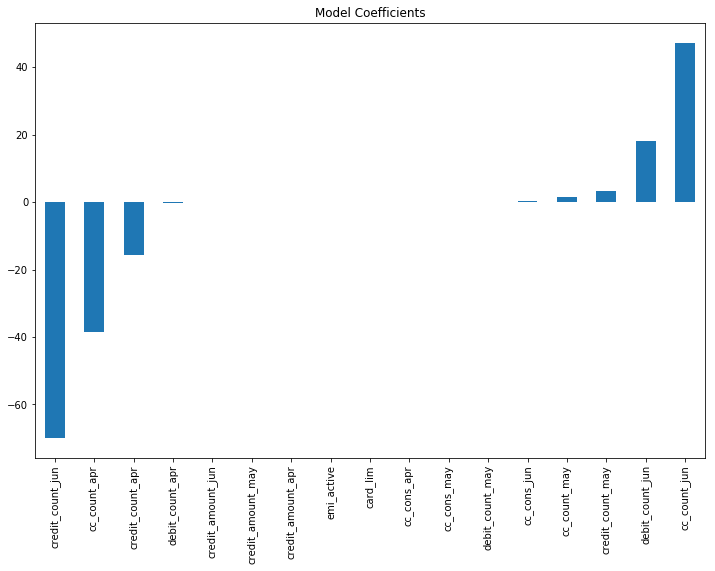

In [67]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1.1e+04


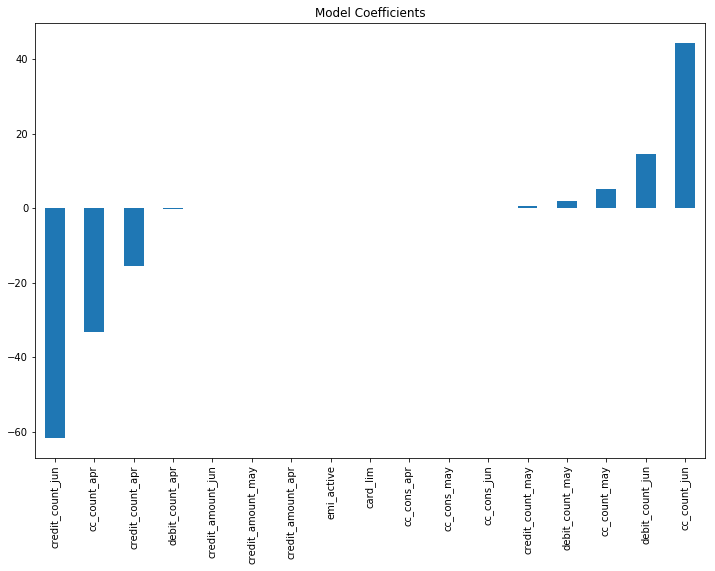

In [68]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

In [86]:
from sklearn.tree import DecisionTreeRegressor


Model Report
RMSE : 1.157e+04


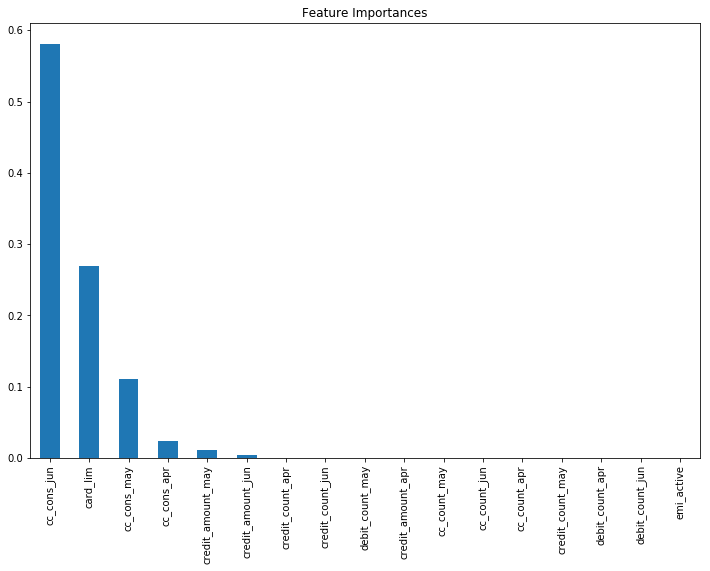

In [114]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1.116e+04


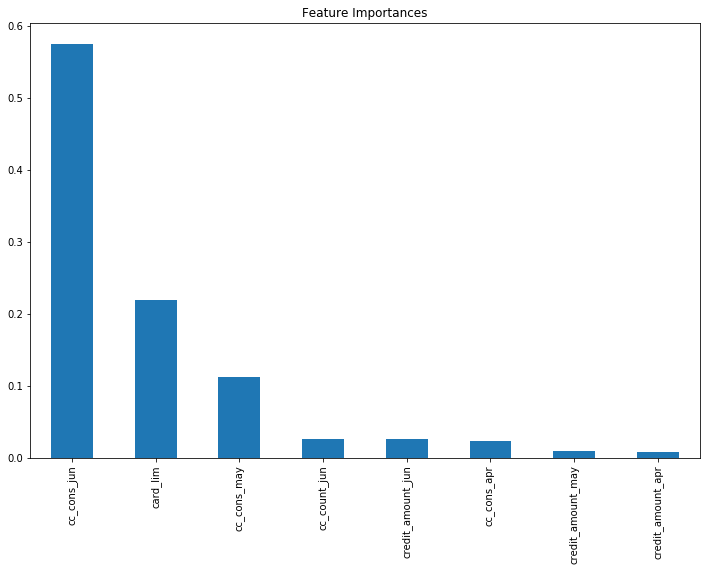

In [96]:
predictors = ['card_lim','cc_cons_apr','cc_cons_may','cc_cons_jun','cc_count_jun','credit_amount_jun','credit_amount_apr','credit_amount_may']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [73]:
from sklearn.ensemble import RandomForestRegressor



Model Report
RMSE : 1.121e+04


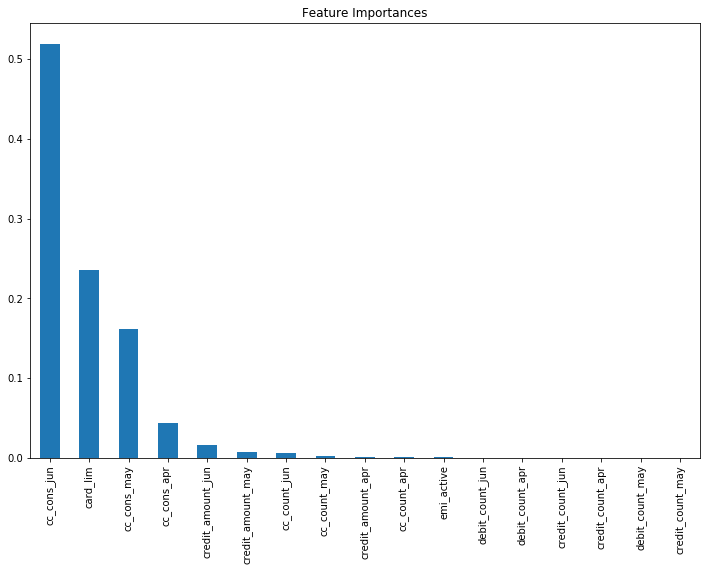

In [97]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=150,max_depth=5, min_samples_leaf=200,n_jobs=5)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1.103e+04


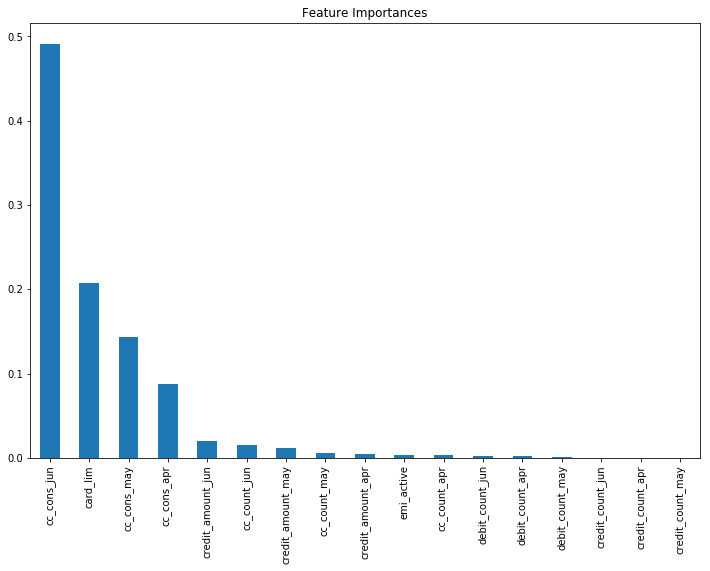

In [75]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=500,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

In [79]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

In [57]:
from xgboost import XGBRegressor

In [43]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb9 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:gamma',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb9, train, test, predictors,target,IDcol, 'xgb9.csv')

C:\Users\Win 8.1\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Win 8.1\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



Model Report
RMSE : 7544


In [58]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb9 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:tweedie',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb9, train, test, predictors,target,IDcol, 'xgb20.csv')

C:\Users\Win 8.1\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Win 8.1\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



Model Report
RMSE : 5746
